X_Minimum : X 최소(삭제)<br>
X_Maximum : X 최대(삭제)<br>
Y_Minimum : Y 최소(삭제)<br>
Y_Maximum : Y 최대(삭제)<br>
Area : 위의 4가지를 조합해서 새로만든 컬럼<br>
Pixels_Areas : 픽셀 영역<br>
X_Perimeter<br>
Y_Perimeter<br>
Sum_of_Luminosity<br>
Minimum_of_Luminosity<br>
Maximum_of_Luminosity<br>
Length_of_Conveyer<br>
TypeOfSteel : 0은 A300, 1은 A400<br>
Steel_Plate_Thickness<br>
Edges_Index<br>
Empty_Index<br>
Square_Index<br>
Outside_X_Index<br>
Edges_X_Index<br>
Edges_Y_Index<br>
Outside_Global_Index<br>
LogOfAreas<br>
Log_X_Index<br>
Log_Y_Index<br>
Orientation_Index<br>
Luminosity_Index<br>
SigmoidOfAreas<br>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
# 모든 컬럼을 출력할 수 있도록 설정
pd.set_option('display.max_columns', None)

path = '/Users/seongjinhyeon/Desktop/Team_project1/mulit_classification_data.csv'

df = pd.read_csv(path)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [87]:
# 데이터프레임 정보 확인(결측치없음)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [86]:
# 중복 확인
df.duplicated().sum()

0

In [69]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [75]:
df['Outside_Global_Index'].value_counts()

1.0    1072
0.0     778
0.5      91
Name: Outside_Global_Index, dtype: int64

#### 이상치 확인 boxplot

##### Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Log_Y_Index

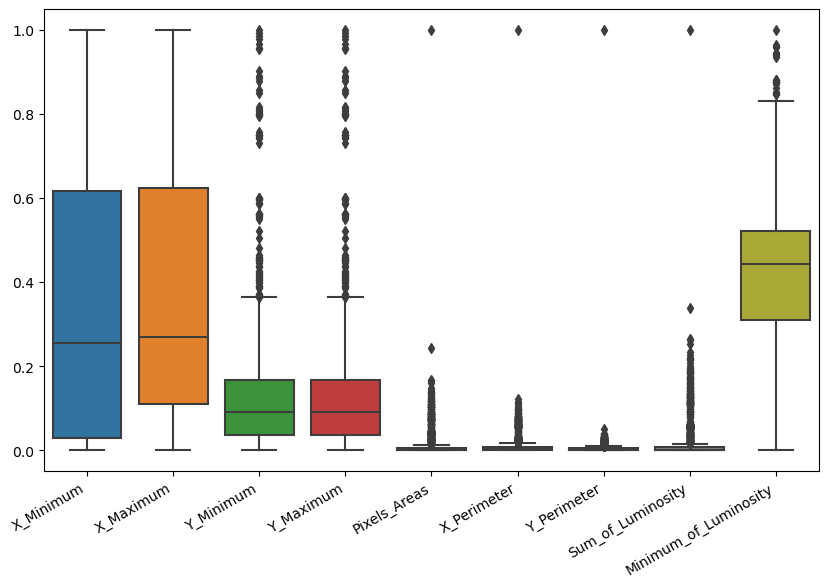

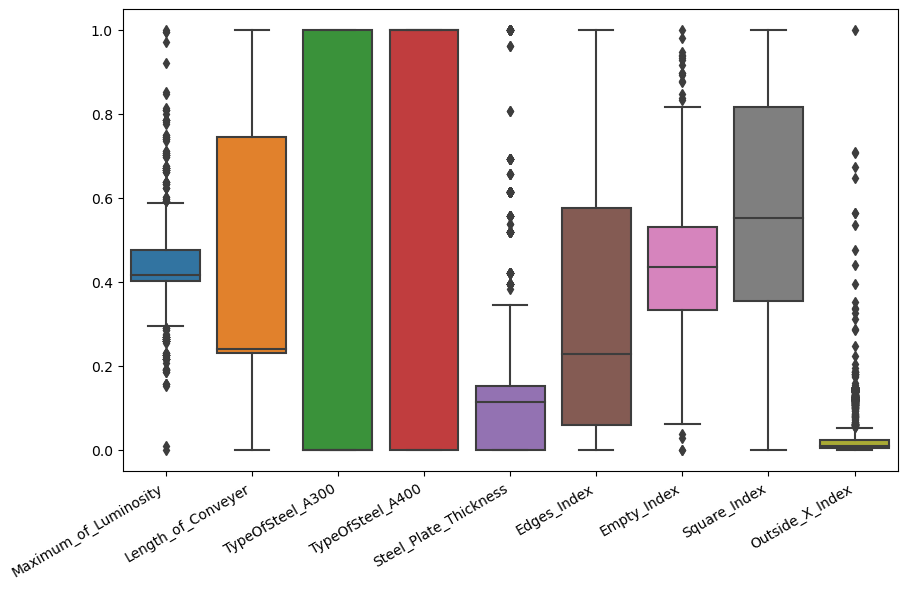

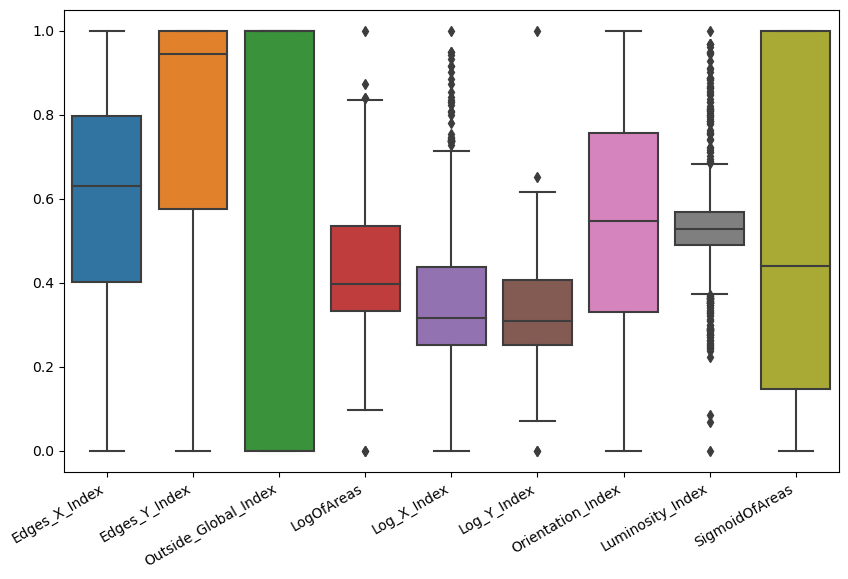

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_graph = df.copy()
df_graph = df_graph.iloc[:, :-7]
scaler = MinMaxScaler()
df_graph_scaler = scaler.fit_transform(df_graph)
df_graph_scaler = pd.DataFrame(df_graph_scaler, columns=df.columns[:-7])

# 그룹당 9개의 컬럼으로 나누어 박스플롯 그리기
num_groups = 3
cols_per_group = 9

for group in range(num_groups):
    start_idx = group * cols_per_group
    end_idx = (group + 1) * cols_per_group
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df_graph_scaler.iloc[:, start_idx:end_idx])
    
    # x축 레이블의 각도 조절
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
    # 그래프 저장하기
    plt.savefig(f"boxplot_group_{group+1}.png", bbox_inches='tight')
    plt.show()

##### TypeOfSteel_A300과 400이 0, 1이기때문에 하나를 제거하기로 함
##### 상관관계가 높기에 수식을 짜 하나의 컬럼으로 생성(다중공선성 해결방안)
##### 'Area' : (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])

In [107]:
# 일단 카피
df_clear = df.copy()
# 타겟특성 빼고 변수에 저장
df_clear = df_clear.drop(df.iloc[:,-7:].columns, axis=1)
# Area라는 컬럼 생성
df_clear['Area'] = (df['X_Maximum'] - df['X_Minimum']) * (df['Y_Maximum'] - df['Y_Minimum'])
# Area컬럼을 생성하는데 사용된 피쳐 제거(X_Maximum, X_Minimum, Y_Maximum, Y_Minimum)
df_clear = df_clear.drop(df.iloc[:, :4].columns, axis=1)
# A300 제거(300 or 400이라 하나 제거 후 컬럼명 어떻게 할지 고민)
df_clear = df_clear.drop('TypeOfSteel_A300', axis=1)
# 일단 TypeOfSteel로만 변경해서 설명란에 0은 300 1은 400으로 해보기로
df_clear.rename(columns={'TypeOfSteel_A400':'TypeOfSteel'}, inplace=True)
df_clear.head()

,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Area
0,267,17,44,24220,76,108,1687,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,352
1,108,10,30,11397,84,123,1687,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,174
2,71,8,19,7972,99,125,1623,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,108
3,176,13,45,18996,99,126,1353,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,315
4,2409,60,260,246930,37,126,1353,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,4369


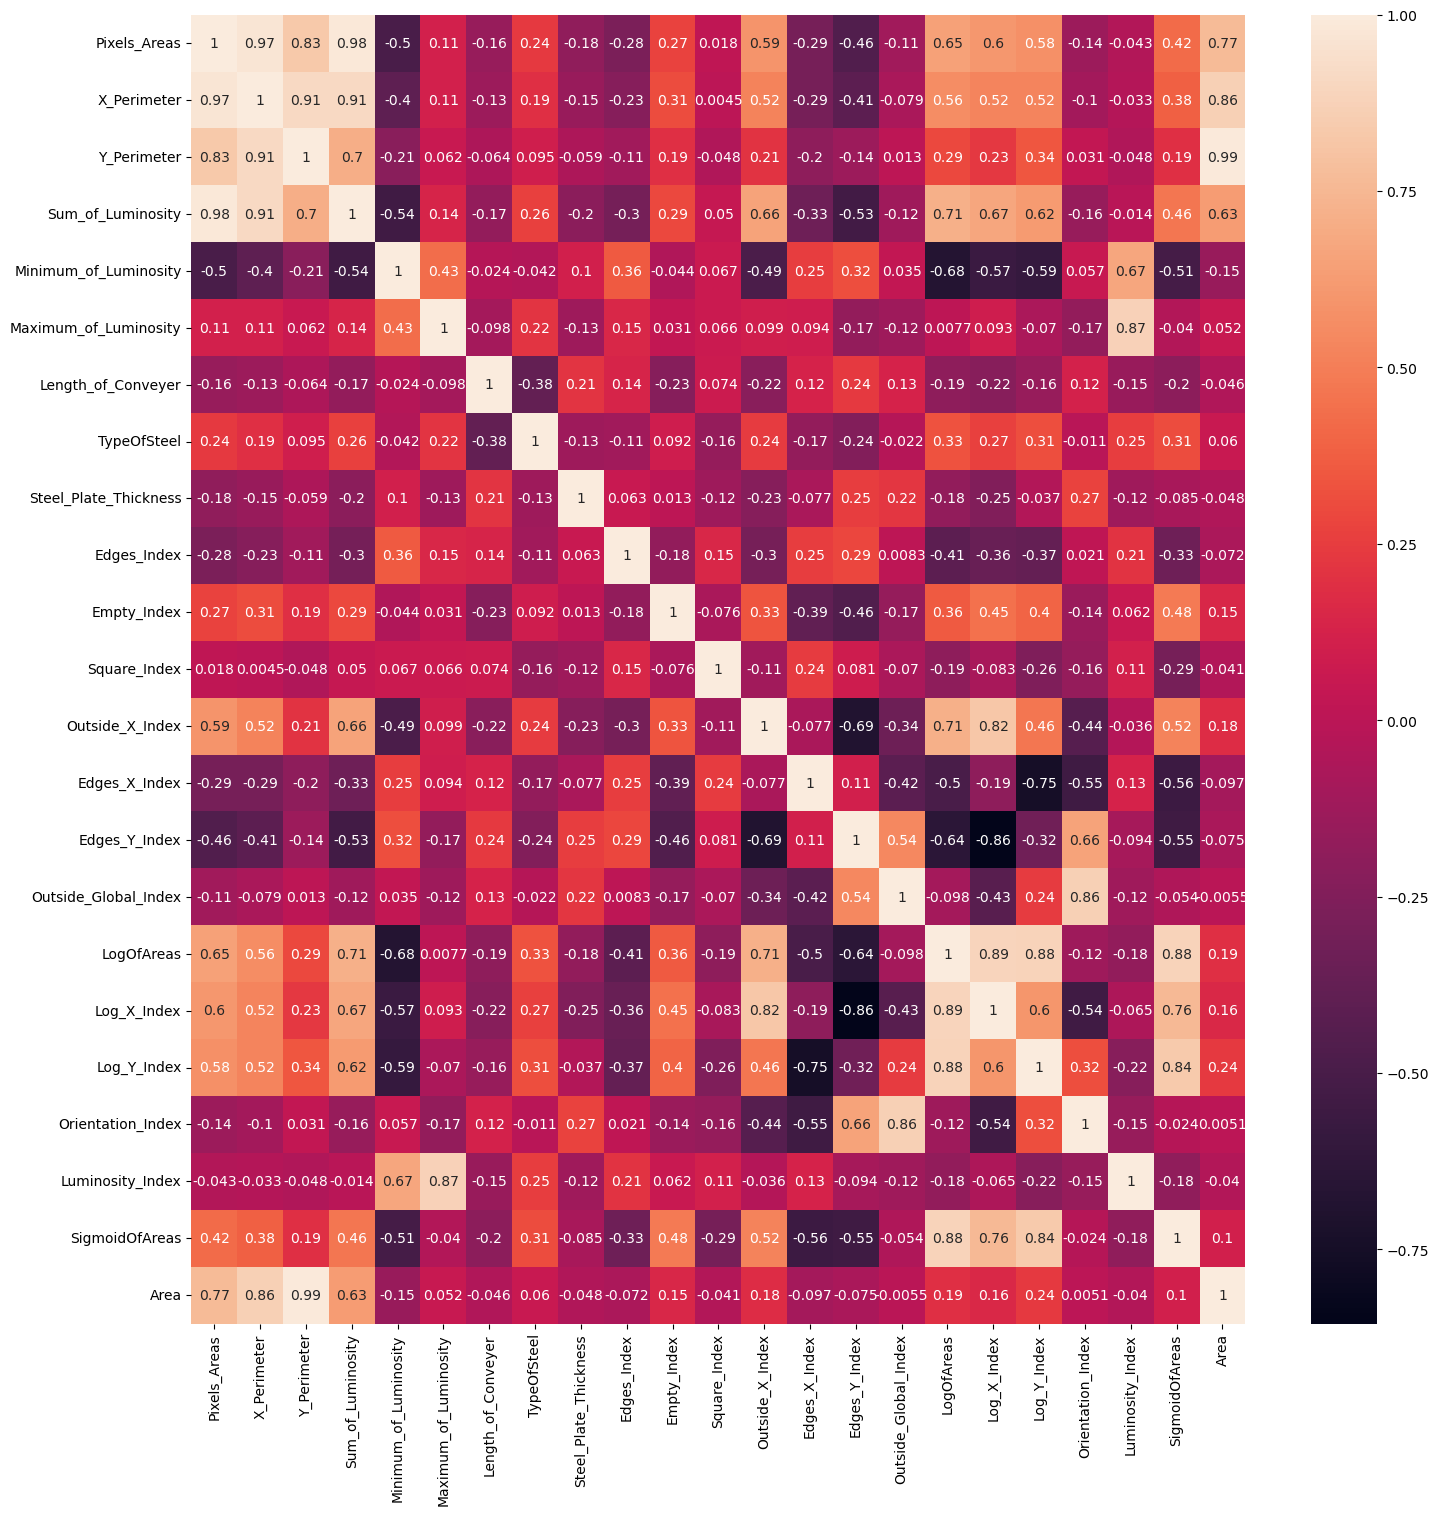

In [108]:
plt.figure(figsize=(17,17))
sns.heatmap(df_clear.corr(),annot=True)
plt.show()

#### 4개 컬럼이 상관관계가 높아 PCA주성분 분석으로 합쳐보기??

In [131]:
from sklearn.decomposition import PCA
# 상관관계가 높은 4개의 컬럼 추출
df_pca = df_clear.iloc[:,:4]
# 확인용
print(df_pca)
# PCA하기전 scaler(MinMaxScaler)적용
df_pca_scaler = scaler.fit_transform(df_pca)
# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_pca_scaler)
pca_df = pd.DataFrame(data=pca_result, columns=[f"PCA_{i+1}" for i in range(4)])
pca_df

      Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity
0              267           17           44              24220
1              108           10           30              11397
2               71            8           19               7972
3              176           13           45              18996
4             2409           60          260             246930
...            ...          ...          ...                ...
1936           273           54           22              35033
1937           287           44           24              34599
1938           292           40           22              37572
1939           419           97           47              52715
1940           103           26           22              11682

[1941 rows x 4 columns]


,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.020660,0.004157,0.001750,-0.000480
1,-0.022468,0.003972,0.001532,-0.000512
2,-0.023059,0.003610,0.001327,-0.000345
3,-0.021422,0.004333,0.001849,-0.000775
4,0.004904,0.003820,0.009701,-0.003269
...,...,...,...,...
1936,-0.018845,0.003907,-0.001625,-0.000113
1937,-0.019204,0.003688,-0.000754,-0.000160
1938,-0.019216,0.003334,-0.000453,-0.000261
1939,-0.015120,0.005489,-0.004010,-0.000238


#### 상관관계가 높은 4개의 컬럼을 스케일링 후 PCA를 돌려서 가장 많이 포함하는 한개의 컬럼으로 수정??(93%)

In [132]:
# 주성분이 가장 높은거 확인

explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_ratios

array([9.33901235e-01, 6.22918016e-02, 3.12377187e-03, 6.83191035e-04])

In [133]:
# 반올림하여 소수점 이하 자리 조정 (예: 소수점 둘째 자리까지 표시)
rounded_ratios = np.round(explained_variance_ratios, decimals=2)

# 총 합 계산
total_variance_ratio = np.sum(rounded_ratios)

# 결과 출력
print("Explained Variance Ratios (Rounded):", rounded_ratios)
print("Total Variance Ratio:", total_variance_ratio)

Explained Variance Ratios (Rounded): [0.93 0.06 0.   0.  ]
Total Variance Ratio: 0.99


In [134]:
pca_df['PCA_1']

0      -0.020660
1      -0.022468
2      -0.023059
3      -0.021422
4       0.004904
          ...   
1936   -0.018845
1937   -0.019204
1938   -0.019216
1939   -0.015120
1940   -0.021937
Name: PCA_1, Length: 1941, dtype: float64